In [2]:
import pandas as pd

train = pd.read_csv('xTrainFinal.csv')
test = pd.read_csv('xTest.csv')
test.head()

,Player,Age,Team,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,All Star
0,Shai Gilgeous-Alexander,26,OKC,76,76,34.2,11.3,21.8,0.519,2.1,...,0.9,4.1,5.0,6.4,1.7,1.0,2.4,2.2,32.7,1
1,Giannis Antetokounmpo,30,MIL,67,67,34.2,11.8,19.7,0.601,0.2,...,2.2,9.7,11.9,6.5,0.9,1.2,3.1,2.3,30.4,1
2,Nikola Jokić,29,DEN,69,69,36.8,11.3,19.6,0.575,2.0,...,2.9,9.9,12.8,10.3,1.8,0.6,3.3,2.3,29.8,1
3,Luka Dončić,25,2TM,50,50,35.4,9.2,20.5,0.450,3.5,...,0.8,7.4,8.2,7.7,1.8,0.4,3.6,2.5,28.2,0
4,Anthony Edwards,23,MIN,78,78,36.3,9.1,20.3,0.447,4.0,...,0.8,4.9,5.7,4.5,1.1,0.6,3.2,1.9,27.4,1


In [3]:
from sklearn.preprocessing import StandardScaler


Xtrain = train.drop(columns=['Player','Team', 'All Star'])
ytrain = train['All Star']

Xtest = test.drop(columns=['Player','Team', 'All Star'])
ytest = test['All Star']

scaler = StandardScaler()
XTrainScaled = scaler.fit_transform(Xtrain)
XTestScaled = scaler.transform(Xtest)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

scores=[]

for i in range(1,11):
    for j in range(1,11):
        model = LogisticRegression(max_iter=5000,class_weight={0:i, 1:j})
        model.fit(XTrainScaled, ytrain)
        yPred = model.predict(XTestScaled)
        acc = accuracy_score(ytest, yPred)
        f1 = f1_score(ytest, yPred, pos_label=1)
        scores.append((i, j, acc, f1))

#print("Accuracy:", accuracy_score(ytest, yPred))
#print(classification_report(ytest, yPred))

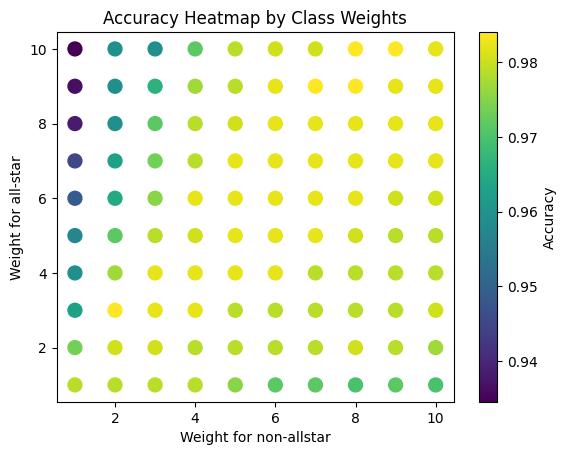

In [5]:
import matplotlib.pyplot as plt

x_vals = [r[0] for r in scores]
y_vals = [r[1] for r in scores]
acc = [r[2] for r in scores]


scatter = plt.scatter(x_vals, y_vals, c=acc, s=100)
plt.colorbar(scatter, label='Accuracy')
plt.xlabel('Weight for non-allstar')
plt.ylabel('Weight for all-star')
plt.title('Accuracy Heatmap by Class Weights')
plt.show()

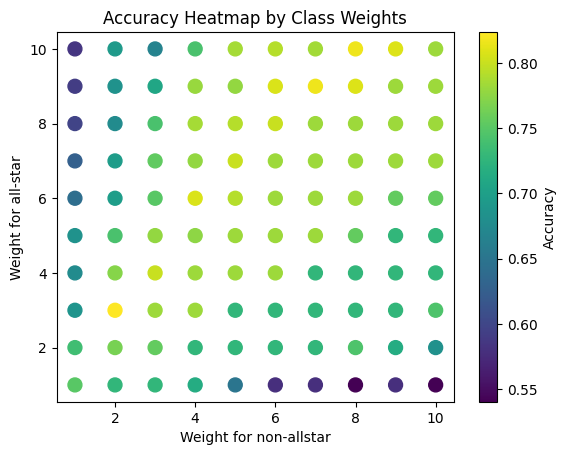

In [6]:
f1 = [r[3] for r in scores] 

scatter = plt.scatter(x_vals, y_vals, c=f1, s=100)
plt.colorbar(scatter, label='Accuracy')
plt.xlabel('Weight for non-allstar')
plt.ylabel('Weight for all-star')
plt.title('Accuracy Heatmap by Class Weights')
plt.show()

In [7]:
results = pd.DataFrame(scores, columns=['i', 'j', 'accuracy', 'f1'])
maxAcc = results.loc[results['accuracy'].idxmax()]
maxf = results.loc[results['f1'].idxmax()]

print(maxAcc)
print(maxf)


i           2.000000
j           3.000000
accuracy    0.984071
f1          0.823529
Name: 12, dtype: float64
i           2.000000
j           3.000000
accuracy    0.984071
f1          0.823529
Name: 12, dtype: float64


In [8]:
#This is my model weight I decided on
model = LogisticRegression(max_iter=5000,class_weight={0:2, 1:3})
model.fit(XTrainScaled, ytrain)
yPred = model.predict(XTestScaled)


print("Accuracy:", accuracy_score(ytest, yPred))
print(classification_report(ytest, yPred))

Accuracy: 0.984070796460177
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       539
           1       0.84      0.81      0.82        26

    accuracy                           0.98       565
   macro avg       0.92      0.90      0.91       565
weighted avg       0.98      0.98      0.98       565



In [10]:
coefs = model.coef_[0]
relevance = {}
for i in range (len(Xtrain.columns)):
    relevance[Xtrain.columns[i]] = coefs[i]

sorted_relevance = dict(sorted(relevance.items(), key=lambda item: abs(item[1]),reverse=True))

for key, value in sorted_relevance.items():
    print(f"{key}: {value}")
    

3P: 1.4950202628197644
FG: 1.1381577695169995
MP: -1.0856577612842697
3PA: -0.8958649271017973
FGA: -0.7889508050998019
PTS: 0.7846844848854291
GS: 0.7658870376527772
2P: 0.692217598995106
2P%: -0.6460684490563804
TRB: 0.6423544813666411
FG%: 0.6112470713716395
G: 0.6016488183675044
STL: 0.546939302686344
ORB: -0.49259035076417906
Age: 0.43853628539562006
TOV: 0.43042316674597136
AST: 0.36839710803093584
2PA: -0.32063076817464853
PF: -0.2921569077442474
DRB: 0.2889850359301341
BLK: 0.28507980995453774
FT: 0.25279535533704867
FTA: 0.24537442098287882
eFG%: 0.13479388719790722
3P%: -0.134144211149762
FT%: 0.09146359310616092


I'm going to shelf this model the acc and f score are really high and good, but I don't like how the coef turned out and which is the deciding factors.











In [271]:
Xtrain['impact'] = (Xtrain['PTS'] + Xtrain['AST'] + Xtrain['STL'] - Xtrain['TOV']) / Xtrain['MP'].replace(0, 0.1)
Xtest['impact'] = (Xtest['PTS'] + Xtest['AST'] + Xtest['STL'] - Xtest['TOV']) / Xtest['MP'].replace(0, 0.1)
XtrainSimple = Xtrain.drop(columns=['Age','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB'])
XtestSimple = Xtest.drop(columns=['Age','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB'])

#(columns=['FGA','3PA','2PA','FTA','ORB','DRB','MP','G','GS'])

XTrainSimpleScaled = scaler.fit_transform(XtrainSimple)
XTestSimpleScaled = scaler.transform(XtestSimple)

In [272]:
scores=[]

for i in range(1,11):
    for j in range(1,11):
        model = LogisticRegression(max_iter=5000,class_weight={0:i, 1:j})
        model.fit(XTrainSimpleScaled, ytrain)
        yPred = model.predict(XTestSimpleScaled)
        acc = accuracy_score(ytest, yPred)
        f1 = f1_score(ytest, yPred, pos_label=1)
        scores.append((i, j, acc, f1))


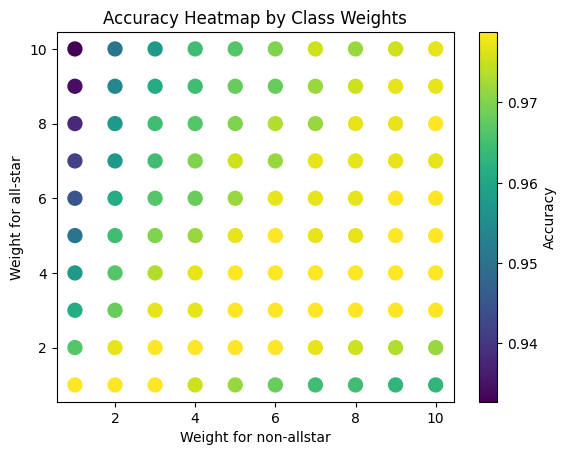

In [273]:
x_vals = [r[0] for r in scores]
y_vals = [r[1] for r in scores]
acc = [r[2] for r in scores]


scatter = plt.scatter(x_vals, y_vals, c=acc, s=100)
plt.colorbar(scatter, label='Accuracy')
plt.xlabel('Weight for non-allstar')
plt.ylabel('Weight for all-star')
plt.title('Accuracy Heatmap by Class Weights')
plt.show()

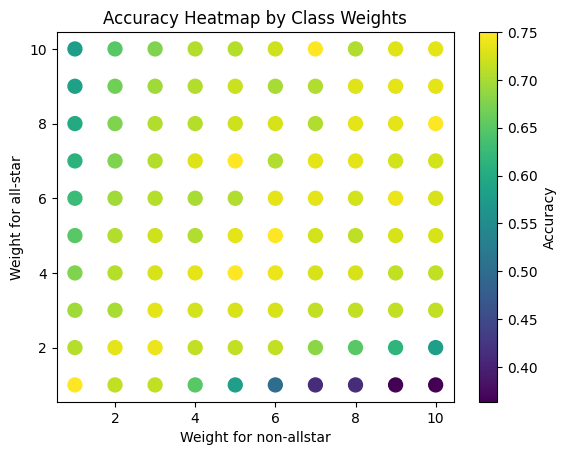

In [274]:
f1 = [r[3] for r in scores] 

scatter = plt.scatter(x_vals, y_vals, c=f1, s=100)
plt.colorbar(scatter, label='Accuracy')
plt.xlabel('Weight for non-allstar')
plt.ylabel('Weight for all-star')
plt.title('Accuracy Heatmap by Class Weights')
plt.show()

In [275]:
results = pd.DataFrame(scores, columns=['i', 'j', 'accuracy', 'f1'])
maxAcc = results.loc[results['accuracy'].idxmax()]
maxf = results.loc[results['f1'].idxmax()]

print(maxAcc)
print(maxf)

i           1.000000
j           1.000000
accuracy    0.978761
f1          0.750000
Name: 0, dtype: float64
i           1.000000
j           1.000000
accuracy    0.978761
f1          0.750000
Name: 0, dtype: float64


In [276]:
#This is my model weight I decided on
model = LogisticRegression(max_iter=5000,class_weight={0:1, 1:1})
model.fit(XTrainSimpleScaled, ytrain)
yPred = model.predict(XTestSimpleScaled)


print("Accuracy:", accuracy_score(ytest, yPred))
print(classification_report(ytest, yPred))

Accuracy: 0.9787610619469026
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       539
           1       0.82      0.69      0.75        26

    accuracy                           0.98       565
   macro avg       0.90      0.84      0.87       565
weighted avg       0.98      0.98      0.98       565



In [277]:
coefs = model.coef_[0]
print(coefs)
print(XtrainSimple.columns)
relevance = {}
for i in range (len(XtrainSimple.columns)):
    relevance[XtrainSimple.columns[i]] = coefs[i]

sorted_relevance = dict(sorted(relevance.items(), key=lambda item: abs(item[1])))

print(sorted_relevance)

[ 1.14374574  0.75533352  0.55203995  0.30958064  0.420641    0.19231028
  0.31248804 -0.34849204  1.7623577   0.3964834 ]
Index(['GS', 'eFG%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'impact'], dtype='object')
{'BLK': 0.1923102818414375, 'AST': 0.30958064380196687, 'TOV': 0.3124880363606635, 'PF': -0.34849204008917944, 'impact': 0.3964833979980206, 'STL': 0.42064100175520003, 'TRB': 0.5520399517470511, 'eFG%': 0.7553335232531223, 'GS': 1.1437457442579049, 'PTS': 1.7623577007708657}


Hmmm so for this model I tookaway a lot of varaible to try and simplfy the model so it stops correlating with stuff like MP, but it ended up correlating more with stuff like minutes played so I am going to switch up the approach and try the randomForest algorithim I think it'll give me a better idea.











In [234]:
from sklearn.ensemble import RandomForestClassifier

scores=[]

for i in range(1,11):
    for j in range(1,11):
        model = RandomForestClassifier(class_weight={0: i, 1: j}, n_estimators=300, random_state=7)
        model.fit(XtrainSimple, ytrain)
        yPred = model.predict(XtestSimple)
        acc = accuracy_score(ytest, yPred)
        f1 = f1_score(ytest, yPred, pos_label=1)
        scores.append((i, j, acc, f1))

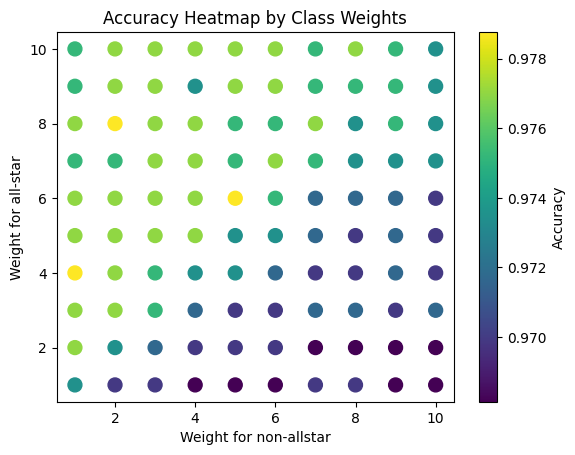

In [235]:
x_vals = [r[0] for r in scores]
y_vals = [r[1] for r in scores]
acc = [r[2] for r in scores]


scatter = plt.scatter(x_vals, y_vals, c=acc, s=100)
plt.colorbar(scatter, label='Accuracy')
plt.xlabel('Weight for non-allstar')
plt.ylabel('Weight for all-star')
plt.title('Accuracy Heatmap by Class Weights')
plt.show()

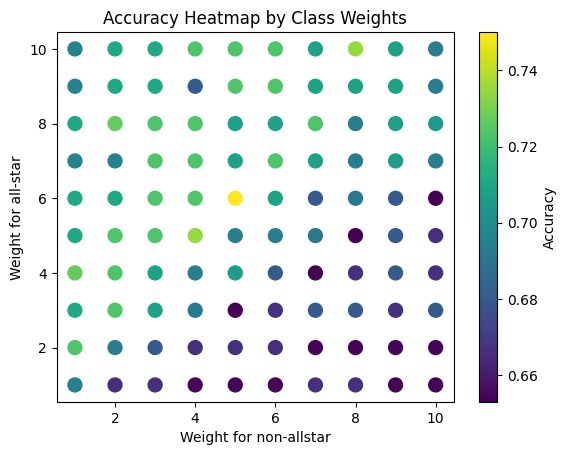

In [236]:
f1 = [r[3] for r in scores] 

scatter = plt.scatter(x_vals, y_vals, c=f1, s=100)
plt.colorbar(scatter, label='Accuracy')
plt.xlabel('Weight for non-allstar')
plt.ylabel('Weight for all-star')
plt.title('Accuracy Heatmap by Class Weights')
plt.show()

In [237]:
results = pd.DataFrame(scores, columns=['i', 'j', 'accuracy', 'f1'])
maxAcc = results.loc[results['accuracy'].idxmax()]
maxf = results.loc[results['f1'].idxmax()]

print(maxAcc)
print(maxf)

i           1.000000
j           4.000000
accuracy    0.978761
f1          0.727273
Name: 3, dtype: float64
i           5.000000
j           6.000000
accuracy    0.978761
f1          0.750000
Name: 45, dtype: float64


In [238]:
model = RandomForestClassifier(class_weight={0: 5, 1: 6}, n_estimators=100, random_state=7)
model.fit(Xtrain, ytrain)
yPred = model.predict(Xtest)

print("Accuracy:", accuracy_score(ytest, yPred))
print(classification_report(ytest, yPred))


Accuracy: 0.9752212389380531
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       539
           1       0.77      0.65      0.71        26

    accuracy                           0.98       565
   macro avg       0.88      0.82      0.85       565
weighted avg       0.97      0.98      0.97       565



In [239]:
coefs = model.feature_importances_
relevance = {}
for i in range (len(XtrainSimple.columns)):
    relevance[XtrainSimple.columns[i]] = coefs[i]

sorted_relevance = dict(sorted(relevance.items(), key=lambda item: abs(item[1])))

print(sorted_relevance)

{'TOV': 0.016026148807846634, 'GS': 0.016259585684273953, 'PF': 0.01626431589895709, 'PTS': 0.01861766665500657, 'eFG%': 0.02294712237214353, 'TRB': 0.029465865584337222, 'AST': 0.04221250386151935, 'BLK': 0.09859564195275954, 'STL': 0.10503785789004288}
